In [ ]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
from IPython.display import display
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer



Import Data

In [ ]:
training_url = 'https://raw.githubusercontent.com/RR979/Assignment1a_dt/main/assignment1_data_main/census_income_data.csv'
test_url = 'https://raw.githubusercontent.com/RR979/Assignment1a_dt/main/assignment1_data_main/census_income_test.csv'
training = pd.read_csv(training_url,skipinitialspace = True)
test = pd.read_csv(test_url,skipinitialspace = True)

In [ ]:
test.to_csv("testing_raw.csv")

In [ ]:
training.rename(columns={"class": "income"}, inplace=True)
training['income'] = training['income'].map({'>50K': 'high', '<=50K': 'low'})

In [ ]:
test.rename(columns={"class": "income"}, inplace=True)
test['income'] = test['income'].map({'>50K.': 'high', '<=50K.': 'low'})

In [ ]:
test


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,low
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,low
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,high
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,high
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,low
16277,64,?,321403,HS-grad,9,Widowed,?,Other-relative,Black,Male,0,0,40,United-States,low
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,low
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,low


**Data Analysis and Preprocessing**

In [ ]:
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)
#Below List Sorted by age

,native_country,income,age,hours_per_week
35,Hungary,high,57.333333,50.000000
8,Columbia,high,53.500000,50.000000
66,Scotland,high,52.666667,46.666667
60,Poland,high,50.583333,39.000000
43,Italy,high,50.360000,45.400000
24,Greece,high,50.250000,50.625000
16,El-Salvador,high,50.111111,45.000000
28,Haiti,high,48.000000,42.750000
14,Ecuador,high,47.500000,48.750000
11,Cuba,low,47.285714,37.985714


In [ ]:
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,native_country,income,age,hours_per_week
31,Honduras,high,47.000000,60.000000
72,Thailand,high,32.666667,58.333333
68,South,high,44.875000,51.437500
20,France,high,40.166667,50.750000
24,Greece,high,50.250000,50.625000
35,Hungary,high,57.333333,50.000000
8,Columbia,high,53.500000,50.000000
80,Yugoslavia,high,40.166667,49.500000
14,Ecuador,high,47.500000,48.750000
41,Ireland,high,43.600000,48.000000


Conclusions

* The Age range of ? high income individuals ranges between Italy low income and USA high income.
* The Age range of ? low income individuals ranges between South low income and Germany low income
* The work hour range of ? high income individuals ranges between Canada high income and USA high income
* The work hour range of ? low income individuals ranges between South low income and Laos low income


In [ ]:
#Understanding the data points in the hours_per_week column
training.hours_per_week.describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [ ]:
#The Understanding how other features vary with native_country
training.loc[(training.native_country == "?")].describe()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week
count,583.000000,583.000000,583.000000,583.000000,583.000000,583.000000
mean,38.725557,193300.897084,10.598628,1806.518010,118.265866,41.512864
std,12.404833,95443.511398,3.123484,11137.277432,471.230665,12.427774
min,17.000000,22245.000000,1.000000,0.000000,0.000000,1.000000
25%,30.000000,133095.500000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,182567.000000,10.000000,0.000000,0.000000,40.000000
75%,46.000000,227144.000000,13.000000,0.000000,0.000000,45.000000
max,90.000000,647882.000000,16.000000,99999.000000,3004.000000,99.000000


In [ ]:
#Replacing ? low income with South and ? high income with USA

training.loc[((training.native_country=="?")&(training.income=="high")),"native_country"] = "United-States"
training.loc[((training.native_country=="?")&(training.income=="low")),"native_country"] = "South"


In [ ]:
#Doing the same for the Testing data
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)
#Below List Sorted by age

,native_country,income,age,hours_per_week
64,Scotland,low,55.222222,42.222222
33,Hungary,high,54.000000,42.666667
76,Yugoslavia,high,53.000000,25.000000
69,Thailand,high,53.000000,45.000000
20,France,high,52.000000,33.750000
43,Jamaica,high,51.600000,45.000000
34,Hungary,low,51.000000,43.333333
54,Peru,high,49.500000,40.000000
52,Outlying-US(Guam-USVI-etc),high,49.000000,40.000000
25,Greece,low,48.000000,42.000000


In [ ]:
# Group data by 'country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['native_country', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,native_country,income,age,hours_per_week
8,Columbia,high,47.000000,62.500000
24,Greece,high,42.600000,59.500000
2,Cambodia,high,30.500000,57.500000
65,South,high,37.750000,51.250000
37,Iran,high,31.000000,50.000000
18,England,high,43.352941,49.411765
60,Portugal,high,39.375000,49.375000
22,Germany,high,47.785714,48.000000
4,Canada,high,47.083333,46.916667
41,Italy,high,46.777778,46.333333


In [ ]:
#Country wise data of high income category
test.loc[((test.income=="high")),"native_country"].value_counts()

United-States                 3523
?                               74
Philippines                     24
Canada                          24
India                           22
England                         17
China                           16
Germany                         14
Mexico                          14
Greece                          10
Italy                            9
Cuba                             9
Japan                            8
Puerto-Rico                      8
Portugal                         8
Ireland                          6
Taiwan                           6
Haiti                            5
Poland                           5
Jamaica                          5
South                            4
Iran                             4
France                           4
Hungary                          3
Dominican-Republic               3
Peru                             2
Hong                             2
Cambodia                         2
Ecuador             

In [ ]:
#replaceing the ? high in test data with USA and ? low also  USA,iran and south randomly
test.loc[((test.native_country=="?")&(test.income=="high")),"native_country"] = "United-States"

random_values = ["United-States", "Iran", "South"]
test['native_country'] = np.where(test['native_country'] == "?", np.random.choice(random_values), test['native_country'])

In [ ]:
test.to_csv("testing_raw.csv",index=False)

In [ ]:
training.to_csv('training_file.csv', index=False)

Analysing the Work class cause it also has some missing values.

In [ ]:
training.workclass.describe()

count       32561
unique          9
top       Private
freq        22696
Name: workclass, dtype: object

In [ ]:
training.workclass.value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [ ]:
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,workclass,income,age,hours_per_week
9,Self-emp-inc,high,48.249196,50.154341
10,Self-emp-inc,low,43.206478,47.135628
11,Self-emp-not-inc,high,46.428177,46.691989
7,Private,high,42.815233,45.500907
13,State-gov,high,45.209632,44.186969
4,Local-gov,high,44.254457,43.956240
12,Self-emp-not-inc,low,44.388553,43.517336
2,Federal-gov,high,45.711590,43.420485
3,Federal-gov,low,40.624788,40.093379
5,Local-gov,low,40.704607,39.739837


In [ ]:
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = training.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by age

,workclass,income,age,hours_per_week
0,?,high,55.617801,36.146597
9,Self-emp-inc,high,48.249196,50.154341
15,Without-pay,low,47.785714,32.714286
11,Self-emp-not-inc,high,46.428177,46.691989
2,Federal-gov,high,45.711590,43.420485
13,State-gov,high,45.209632,44.186969
12,Self-emp-not-inc,low,44.388553,43.517336
4,Local-gov,high,44.254457,43.956240
10,Self-emp-inc,low,43.206478,47.135628
7,Private,high,42.815233,45.500907


We draw the conclusions

* The workclass ? with high income lie in age range of self-employed
* The workclass ? with low income lie in age range of state-gov low and fed-gov low
* The workclass ? with high income lie in work hour range of without pay with low inc and state gov with low inc
* The workclass ? with low income lie in work hour range of without pay low and self employed low



In [ ]:
#Replace the ? with nan first
training["workclass"] = training["workclass"].replace("?",np.nan)

#Function to fill missing values with most frequent value
def fill_missing_values(group):
  mode_workclass = group["workclass"].value_counts().index[0]
  group["workclass"].fillna(mode_workclass,inplace=True)
  return group

#Updating
training = training.groupby(["native_country","income"]).apply(fill_missing_values)

<ipython-input-23-f84c7bc2f445>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  training = training.groupby(["native_country","income"]).apply(fill_missing_values)


In [ ]:
training.to_csv("training_file.csv",index=False)

Applying the same methodology to fill misisng in the occupation column

In [ ]:
#Replace the ? with nan first
training["occupation"]=training["occupation"].replace("?",np.nan)

#Function to fill missing values with most frequent value
def fill_occupation_values(group):
  mode_occupation = group["occupation"].value_counts().index[0]
  group["occupation"].fillna(mode_occupation,inplace=True)
  return group
#Updating
training = training.groupby(["native_country","income"]).apply(fill_occupation_values)

<ipython-input-24-445d8d1563d5>:10: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  training = training.groupby(["native_country","income"]).apply(fill_occupation_values)


In [ ]:
training.to_csv("training_file.csv",index=False)

In [ ]:
test.workclass.describe()

count       16281
unique          9
top       Private
freq        11210
Name: workclass, dtype: object

In [ ]:
test.workclass.value_counts()

Private             11210
Self-emp-not-inc     1321
Local-gov            1043
?                     963
State-gov             683
Self-emp-inc          579
Federal-gov           472
Without-pay             7
Never-worked            3
Name: workclass, dtype: int64

In [ ]:
#Doing the same for testing data
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["hours_per_week"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by Hours worked per week

,workclass,income,age,hours_per_week
9,Self-emp-inc,high,47.028481,50.411392
15,Without-pay,high,57.000000,50.000000
11,Self-emp-not-inc,high,47.252125,47.739377
10,Self-emp-inc,low,43.399240,45.307985
7,Private,high,42.977310,45.163366
4,Local-gov,high,44.380645,44.564516
2,Federal-gov,high,45.721053,43.768421
13,State-gov,high,45.683616,43.700565
12,Self-emp-not-inc,low,45.584711,43.105372
3,Federal-gov,low,40.414894,40.450355


In [ ]:
# Group data by 'work class','country' and 'class', and calculate the mean for 'age' and 'work hours'
grouped_data = test.groupby(['workclass', 'income']).agg({'age': 'mean', 'hours_per_week': 'mean'}).reset_index()
sorted_grouped_data = grouped_data.sort_values(by=["age"],ascending=False)

# Print the grouped data
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(sorted_grouped_data)

#Below List Sorted by age

,workclass,income,age,hours_per_week
15,Without-pay,high,57.000000,50.000000
0,?,high,55.648649,32.837838
11,Self-emp-not-inc,high,47.252125,47.739377
9,Self-emp-inc,high,47.028481,50.411392
2,Federal-gov,high,45.721053,43.768421
13,State-gov,high,45.683616,43.700565
12,Self-emp-not-inc,low,45.584711,43.105372
4,Local-gov,high,44.380645,44.564516
10,Self-emp-inc,low,43.399240,45.307985
7,Private,high,42.977310,45.163366


In [ ]:
#Replace the ? with nan first
test["workclass"] = test["workclass"].replace("?",np.nan)

#Function to fill missing values in workclass column with most frequent value
def fill_missing_values(group):
  mode_workclass = group["workclass"].value_counts().index[0]
  group["workclass"].fillna(mode_workclass,inplace=True)
  return group

#Updating
test = test.groupby(["native_country","income"]).apply(fill_missing_values)

<ipython-input-30-82a31994381f>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = test.groupby(["native_country","income"]).apply(fill_missing_values)


In [ ]:
#Same for Occupation column
#Replace the ? with nan first
test["occupation"]=test["occupation"].replace("?",np.nan)

#Function to fill missing values with most frequent value
def fill_occupation_values(group):
  mode_occupation = group["occupation"].value_counts().index[0]
  group["occupation"].fillna(mode_occupation,inplace=True)
  return group
#Updating
test = test.groupby(["native_country","income"]).apply(fill_occupation_values)

<ipython-input-31-78e261c0cd71>:11: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  test = test.groupby(["native_country","income"]).apply(fill_occupation_values)


In [ ]:
test.to_csv("testing_raw.csv",index=False)

In [ ]:
##*****IGNORE*******
#import csv

#def extract_columns(input_file, output_file):
 #   with open(input_file, 'r') as csv_file:
 #       reader = csv.reader(csv_file)
 #       data = list(reader)

 #   extracted_data = [[row[0], row[-1]] for row in data]

  #  with open(output_file, 'w', newline='') as csv_output:
  #      writer = csv.writer(csv_output)
   #     writer.writerows(extracted_data)

# Example usage
#input_file = '/content/training_file.csv'
#output_file = '2_col.csv'
#extract_columns(input_file, output_file)


In [ ]:
##*****IGNORE*******
#import pandas as pd
#import matplotlib.pyplot as plt

# Read the data from the CSV file
#data = pd.read_csv('2_col.csv')

# Group the data by age and income and count the occurrences
#grouped_data = data.groupby(['age', 'income']).size().unstack()

# Plotting the distribution
#grouped_data.plot(kind='bar', stacked=True)
#plt.xlabel('Age')
#plt.ylabel('Count')
#plt.title('Distribution of Income Among Different Age Groups')
#plt.legend(title='Income')

#plt.xticks(range(min(data['age']), max(data['age'])+1, 5))


#plt.show()


**Data Visualisation**

In [ ]:
def draw_barplot(x):
    s = x.value_counts()
    plt.bar(s.index, s.values)

In [ ]:
df = pd.read_csv("training_file.csv")
#discretizer = KBinsDiscretizer(n_bins=6, encode='ordinal', strategy='quantile')
#df['age'] = discretizer.fit_transform(df['age'].values.reshape(-1, 1)).astype('int')
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,low
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,low
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,low
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,low
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,low
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,high
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,low
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,low


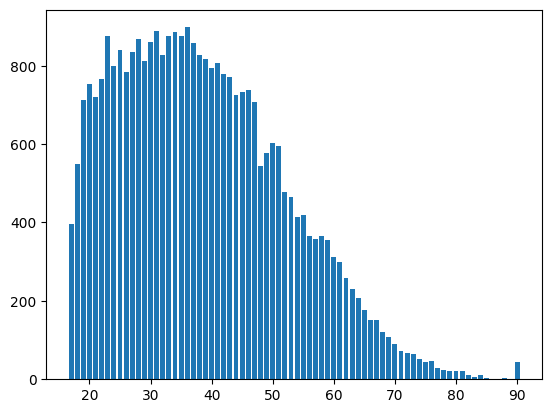

In [ ]:
#Bar plot for the age
draw_barplot(df.age)

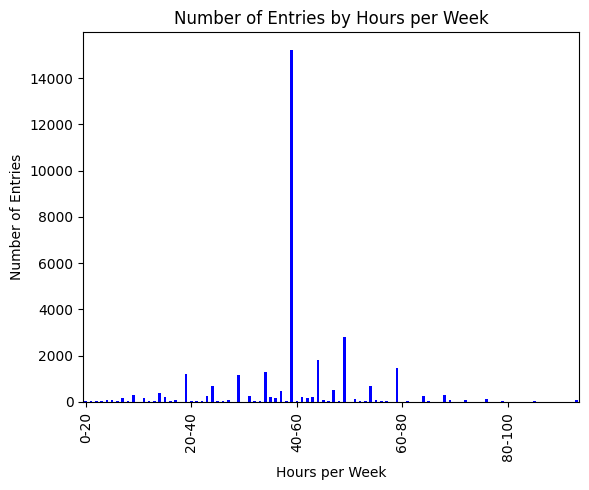

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file

# Group the data by hours per week and count the number of entries
grouped_data = df.groupby('hours_per_week').size()


bin_edges = [0, 20, 40, 60, 80, 100]
bin_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Plotting the data
grouped_data.plot(kind='bar', color='blue')
plt.xlabel('Hours per Week')
plt.ylabel('Number of Entries')
plt.title('Number of Entries by Hours per Week')
plt.xticks(bin_edges[:-1], bin_labels)

plt.show()


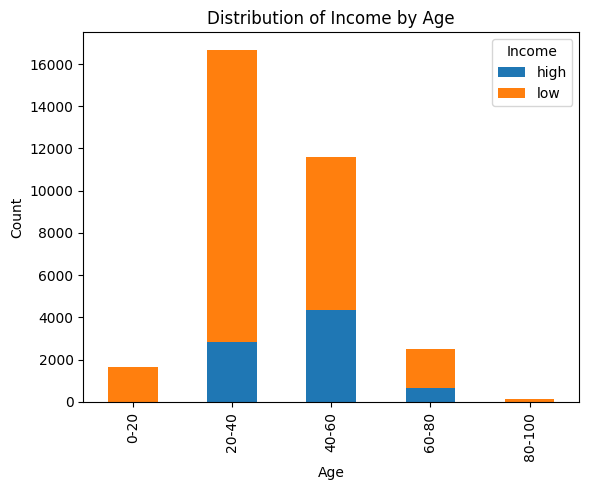

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the CSV file

# Group the data by hours per week and count the number of entries
grouped_data = df.groupby('age').size()


bin_edges = [0, 20, 40, 60, 80, 100]
bin_labels = ['0-20', '20-40', '40-60', '60-80', '80-100']

# Bin the 'hours_per_week' column
df['age_bin'] = pd.cut(df['age'], bins=bin_edges, labels=bin_labels, right=False)

# Group the data by the new 'hours_bin' column and income, and count the occurrences
grouped_data = df.groupby(['age_bin', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Income by Age')
plt.legend(title='Income')

plt.show()


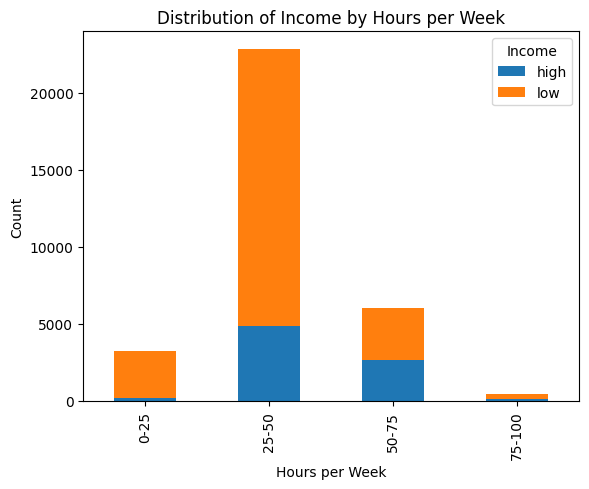

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with columns 'hours_per_week' and 'income'

# Define the bin edges and labels
bin_edges = [0, 25, 50, 75, 100]
bin_labels = ["0-25","25-50","50-75","75-100"]

# Bin the 'hours_per_week' column
df['hours_bin'] = pd.cut(df['hours_per_week'], bins=bin_edges, labels=bin_labels, right=False)

# Group the data by the new 'hours_bin' column and income, and count the occurrences
grouped_data = df.groupby(['hours_bin', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Hours per Week')
plt.ylabel('Count')
plt.title('Distribution of Income by Hours per Week')
plt.legend(title='Income')

plt.show()



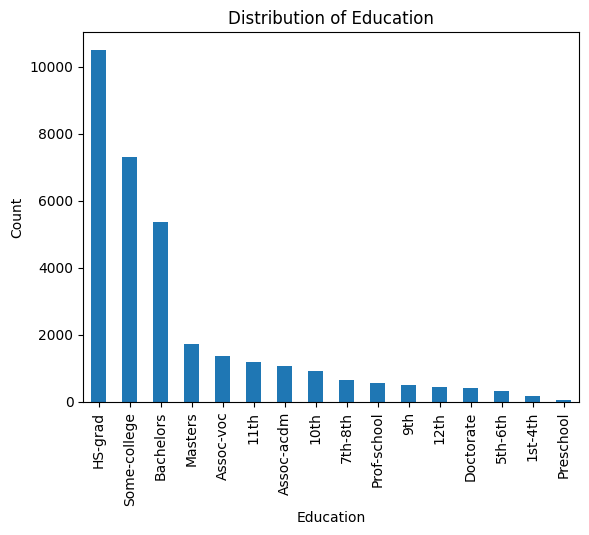

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with a column 'education'

# Count the occurrences of each education category
education_counts = df['education'].value_counts()

# Plotting the data
education_counts.plot(kind='bar')
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Education')

plt.show()


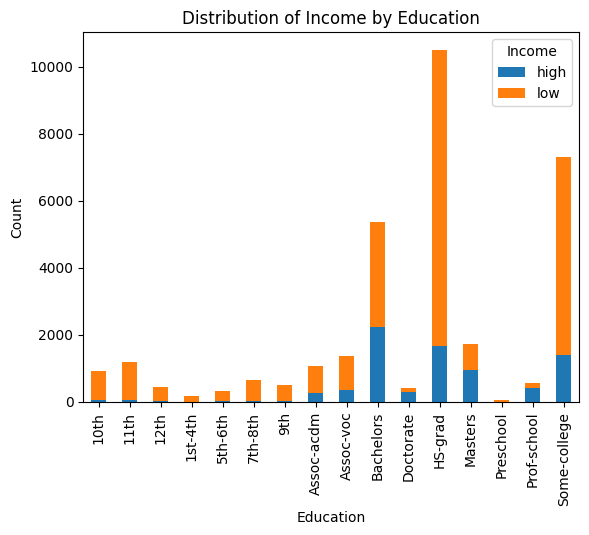

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with columns 'education' and 'income'

# Group the data by education and income, and count the occurrences
grouped_data = df.groupby(['education', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Education')
plt.ylabel('Count')
plt.title('Distribution of Income by Education')
plt.legend(title='Income')

plt.show()


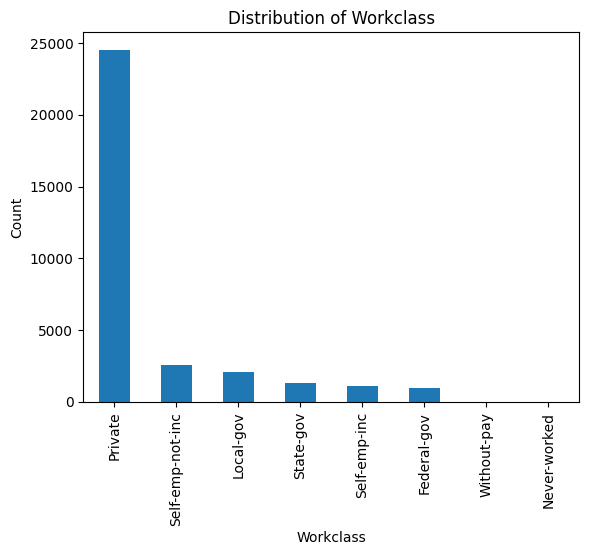

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with a column 'workclass'

# Count the occurrences of each workclass category
workclass_counts = df['workclass'].value_counts()

# Plotting the data
workclass_counts.plot(kind='bar')
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Workclass')

plt.show()


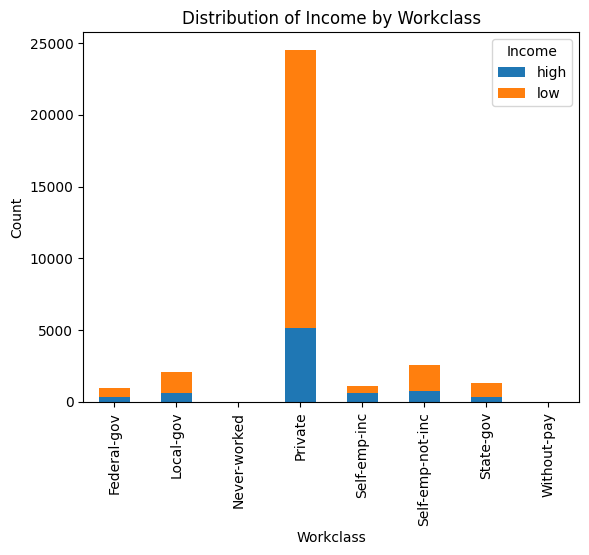

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with columns 'workclass' and 'income'

# Group the data by workclass and income, and count the occurrences
grouped_data = df.groupby(['workclass', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Workclass')
plt.ylabel('Count')
plt.title('Distribution of Income by Workclass')
plt.legend(title='Income')

plt.show()


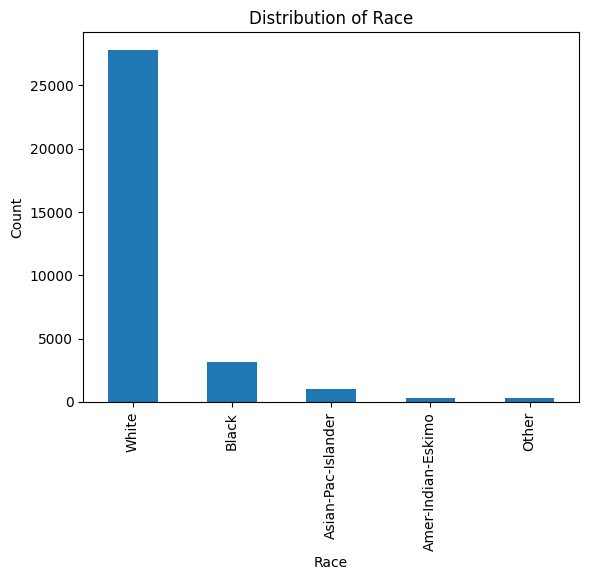

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with a column 'race'

# Count the occurrences of each race category
race_counts = df['race'].value_counts()

# Plotting the data
race_counts.plot(kind='bar')
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Race')

plt.show()


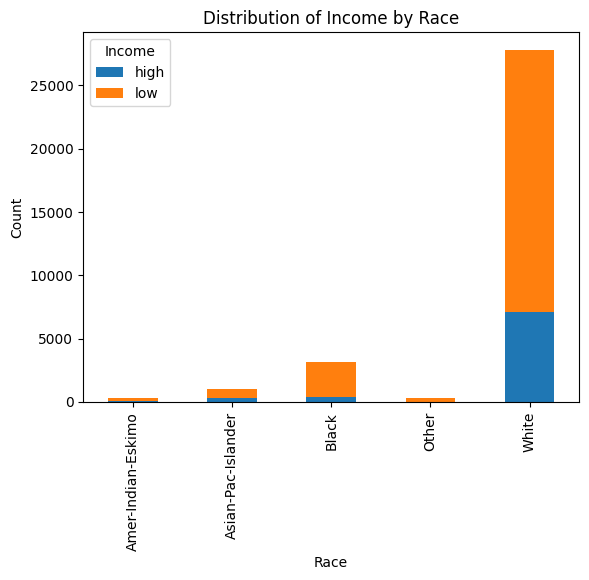

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with columns 'race' and 'income'

# Group the data by race and income, and count the occurrences
grouped_data = df.groupby(['race', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of Income by Race')
plt.legend(title='Income')

plt.show()


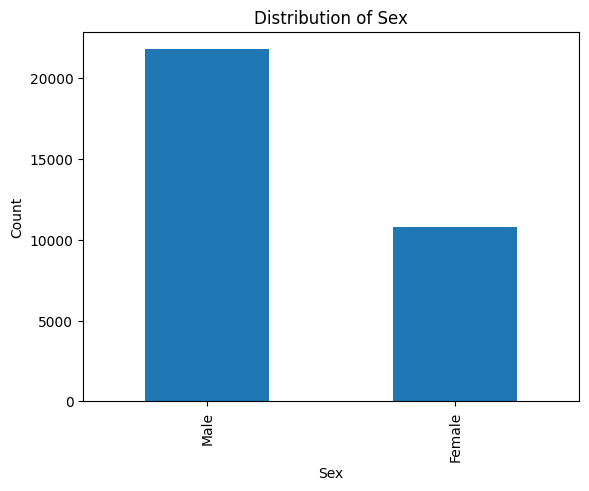

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with a column 'sex'

# Count the occurrences of each sex category
sex_counts = df['sex'].value_counts()

# Plotting the data
sex_counts.plot(kind='bar')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')

plt.show()


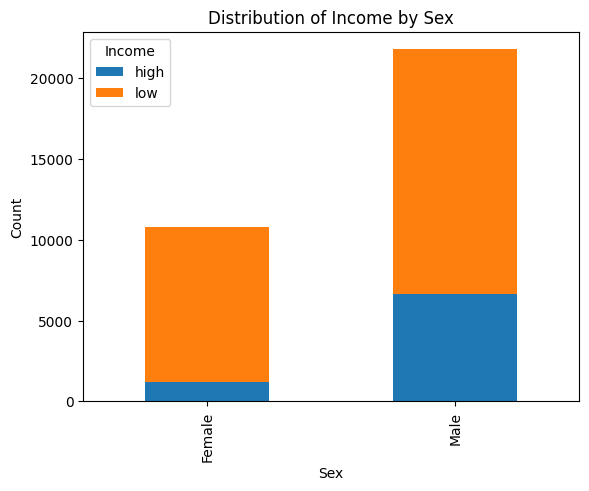

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with columns 'sex' and 'income'

# Group the data by sex and income, and count the occurrences
grouped_data = df.groupby(['sex', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Income by Sex')
plt.legend(title='Income')

plt.show()


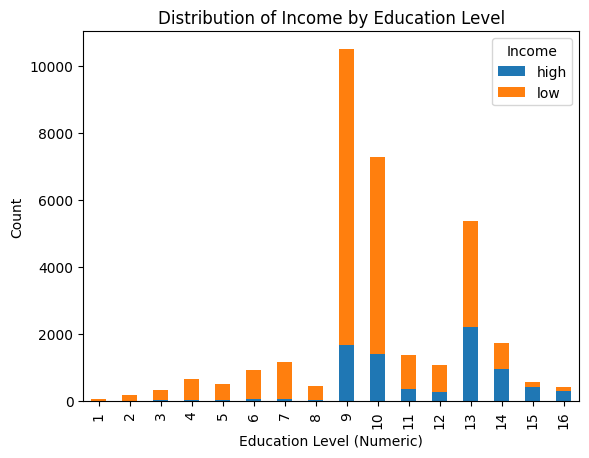

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you already have a DataFrame `df` with columns 'education_num' and 'income'

# Group the data by education_num and income, and count the occurrences
grouped_data = df.groupby(['education_num', 'income']).size().unstack()

# Plotting the data
grouped_data.plot(kind='bar', stacked=True)
plt.xlabel('Education Level (Numeric)')
plt.ylabel('Count')
plt.title('Distribution of Income by Education Level')
plt.legend(title='Income')

plt.show()


In [ ]:
df
#We need to remove the hours bins column which got added while we were binning the hours_per_week to plot it


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,low
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,low
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,low
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,low
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,low
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,high
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,low
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,low


In [ ]:
training=pd.read_csv("training_file.csv")
training.hours_per_week.describe()

count    32561.000000
mean        40.437456
std         12.347429
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours_per_week, dtype: float64

In [ ]:
import pandas as pd

# Remove the last column, but remember to not run this ccode more than once, else it will keep removing a colum every time. So run once and comment it out
#df = df.iloc[:, :-1]
#Run twice infact, cause we have age bins column too

# Save the modified DataFrame back to a CSV file
df.to_csv("final_training_file.csv", index=False)
df





,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,low
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,low
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,low
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,low
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,low
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,high
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,low
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,low


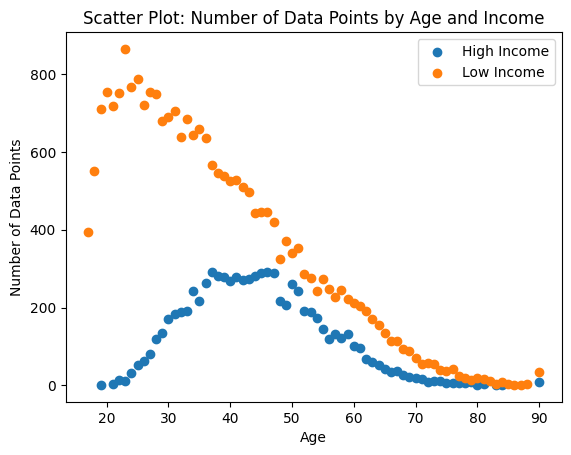

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("final_training_file.csv")

# Filter the data for high and low income values
high_income_data = data[data['income'] == 'high']
low_income_data = data[data['income'] == 'low']

# Count the number of data points for each income category and age
high_income_counts = high_income_data['age'].value_counts().sort_index()
low_income_counts = low_income_data['age'].value_counts().sort_index()

# Plotting the scatter plot
plt.scatter(high_income_counts.index, high_income_counts.values, label='High Income')
plt.scatter(low_income_counts.index, low_income_counts.values, label='Low Income')

# Plot configuration
plt.xlabel('Age')
plt.ylabel('Number of Data Points')
plt.title('Scatter Plot: Number of Data Points by Age and Income')
plt.legend()

# Display the plot
plt.show()


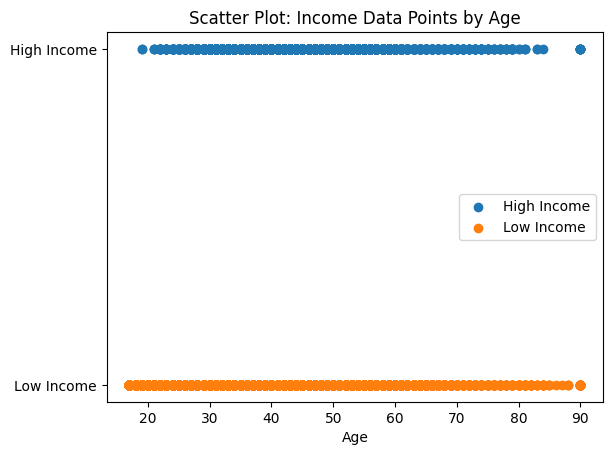

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the CSV file
data = pd.read_csv("final_training_file.csv")

# Filter the data for high and low income values
high_income_data = data[data['income'] == 'high']
low_income_data = data[data['income'] == 'low']

# Plotting the scatter plot
plt.scatter(high_income_data['age'], [1] * len(high_income_data), label='High Income')
plt.scatter(low_income_data['age'], [0] * len(low_income_data), label='Low Income')

# Plot configuration
plt.xlabel('Age')
plt.yticks([0, 1], ['Low Income', 'High Income'])
plt.title('Scatter Plot: Income Data Points by Age')
plt.legend()

# Display the plot
plt.show()


In [ ]:
! pip install --upgrade scikit-learn


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.8/10.8 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2


**Data Encoding**

In [ ]:
test = pd.read_csv("testing_raw.csv")
test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,low
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,low
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,high
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,high
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,low
16277,64,Private,321403,HS-grad,9,Widowed,Adm-clerical,Other-relative,Black,Male,0,0,40,United-States,low
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,low
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,low


In [ ]:
df["income"]=df["income"].map({"low":"<=50k","high":">50k"})
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50k
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50k
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50k
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50k


In [ ]:
test["income"]=test["income"].map({"low":"<=50k","high":">50k"})
test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50k
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50k
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50k
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50k
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50k
16277,64,Private,321403,HS-grad,9,Widowed,Adm-clerical,Other-relative,Black,Male,0,0,40,United-States,<=50k
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


In [ ]:
from sklearn import preprocessing

# encode categorical variables using label Encoder

# select all categorical variables
df_categorical = df.select_dtypes(include=['object'])
df_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50k
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50k
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50k
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50k
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50k


In [ ]:
# apply label encoder to df_categorical
le = preprocessing.LabelEncoder()
df_categorical = df_categorical.apply(le.fit_transform)
df_categorical.head(25)

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,6,9,4,0,1,4,1,38,0
1,5,9,2,3,0,4,1,38,0
2,3,11,0,5,1,4,1,38,0
3,3,1,2,5,0,2,1,38,0
4,3,9,2,9,5,2,0,4,0
5,3,12,2,3,5,4,0,38,0
6,3,6,3,7,1,2,0,22,0
7,5,11,2,3,0,4,1,38,1
8,3,12,4,9,1,4,0,38,1
9,3,9,2,3,0,4,1,38,1


In [ ]:
#Do the same for testing data set
test_categorical = test.select_dtypes(include=['object'])
test_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,Private,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,United-States,<=50k
1,Private,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,United-States,<=50k
2,Local-gov,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,United-States,>50k
3,Private,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,United-States,>50k
4,Private,Some-college,Never-married,Adm-clerical,Own-child,White,Female,United-States,<=50k


In [ ]:
# apply label encoder to test_categorical
lem = preprocessing.LabelEncoder()
test_categorical = test_categorical.apply(lem.fit_transform)
test_categorical.head()

,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,3,1,4,6,3,2,1,37,0
1,3,11,2,4,0,4,1,37,0
2,1,7,2,10,0,4,1,37,1
3,3,15,2,6,0,2,1,37,1
4,3,15,4,0,3,4,0,37,0


In [ ]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50k
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50k
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50k
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50k
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50k
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50k
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50k
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50k


In [ ]:
test

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50k
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50k
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50k
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50k
4,18,Private,103497,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,30,United-States,<=50k
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16276,39,Private,215419,Bachelors,13,Divorced,Prof-specialty,Not-in-family,White,Female,0,0,36,United-States,<=50k
16277,64,Private,321403,HS-grad,9,Widowed,Adm-clerical,Other-relative,Black,Male,0,0,40,United-States,<=50k
16278,38,Private,374983,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,50,United-States,<=50k
16279,44,Private,83891,Bachelors,13,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,5455,0,40,United-States,<=50k


In [ ]:
#Concatenate df_categorical dataframe with original df (dataframe)

# first, Drop earlier duplicate columns which had categorical values
df = df.drop(df_categorical.columns,axis=1)
df = pd.concat([df,df_categorical],axis=1)
df.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,39,77516,13,2174,0,40,6,9,4,0,1,4,1,38,0
1,50,83311,13,0,0,13,5,9,2,3,0,4,1,38,0
2,38,215646,9,0,0,40,3,11,0,5,1,4,1,38,0
3,53,234721,7,0,0,40,3,1,2,5,0,2,1,38,0
4,28,338409,13,0,0,40,3,9,2,9,5,2,0,4,0


In [ ]:
#Same for the testing dataframe
#Concatenate test_categorical dataframe with original test dataframe

# first, Drop earlier duplicate columns which had categorical values
test = test.drop(test_categorical.columns,axis=1)
test = pd.concat([test,test_categorical],axis=1)
test.head()

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,25,226802,7,0,0,40,3,1,4,6,3,2,1,37,0
1,38,89814,9,0,0,50,3,11,2,4,0,4,1,37,0
2,28,336951,12,0,0,40,1,7,2,10,0,4,1,37,1
3,44,160323,10,7688,0,40,3,15,2,6,0,2,1,37,1
4,18,103497,10,0,0,30,3,15,4,0,3,4,0,37,0


In [ ]:
# convert target variable income to categorical
df['income'] = df['income'].astype('category')

In [ ]:
# convert target variable income to categorical
test["income"] = test["income"].astype("category")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             32561 non-null  int64   
 1   fnlwgt          32561 non-null  int64   
 2   education_num   32561 non-null  int64   
 3   capital_gain    32561 non-null  int64   
 4   capital_loss    32561 non-null  int64   
 5   hours_per_week  32561 non-null  int64   
 6   workclass       32561 non-null  int64   
 7   education       32561 non-null  int64   
 8   marital_status  32561 non-null  int64   
 9   occupation      32561 non-null  int64   
 10  relationship    32561 non-null  int64   
 11  race            32561 non-null  int64   
 12  sex             32561 non-null  int64   
 13  native_country  32561 non-null  int64   
 14  income          32561 non-null  category
dtypes: category(1), int64(14)
memory usage: 3.5 MB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16281 entries, 0 to 16280
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   age             16281 non-null  int64   
 1   fnlwgt          16281 non-null  int64   
 2   education_num   16281 non-null  int64   
 3   capital_gain    16281 non-null  int64   
 4   capital_loss    16281 non-null  int64   
 5   hours_per_week  16281 non-null  int64   
 6   workclass       16281 non-null  int64   
 7   education       16281 non-null  int64   
 8   marital_status  16281 non-null  int64   
 9   occupation      16281 non-null  int64   
 10  relationship    16281 non-null  int64   
 11  race            16281 non-null  int64   
 12  sex             16281 non-null  int64   
 13  native_country  16281 non-null  int64   
 14  income          16281 non-null  category
dtypes: category(1), int64(14)
memory usage: 1.8 MB


In [ ]:
df.to_csv("encoded_training.csv")

In [ ]:
test.to_csv("encoded_testing.csv")

**Building the Decision tree**

In [ ]:
#Splitting the traing data

#Independent Variables/Feature
X = df.drop('income',axis=1)

#Response/Dependant variables
y = df['income']

In [ ]:
#Creating a copy just for convinience
X_copy = X.copy()

In [ ]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: income, dtype: category
Categories (2, int64): [0, 1]

In the code above, we:

Load the train_test_split function
We then create four variables for our training and testing data
We assign the random_state= parameter here to ensure that we have reproducible results

In [ ]:
#Split data into training and testing for accuracy

#X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,random_state=99)
X_train,X_test,y_train,y_test = train_test_split(X_copy,y,test_size=0.30,random_state=99)

In [ ]:
X_train

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
5728,46,109089,15,0,0,40,1,14,2,10,0,4,1,38
10700,68,146645,16,20051,0,50,3,10,2,3,0,4,1,38
29425,62,138621,11,0,0,20,3,8,5,8,1,2,0,38
2088,31,207301,9,0,0,40,0,11,2,0,5,4,0,38
16292,34,177304,6,0,0,40,3,0,0,6,1,4,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9929,22,399020,10,0,0,55,1,15,4,0,1,4,0,38
3240,34,56883,10,0,0,40,3,15,4,7,4,4,0,38
13497,58,343957,13,0,0,50,3,9,0,11,1,4,1,38
23587,40,187702,10,0,0,50,3,15,4,3,1,4,1,38


# How to Import the DecisionTreeClassifer Class
from sklearn.tree import DecisionTreeClassifier
DecisionTreeClassifier(
    *,
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    class_weight=None,
    ccp_alpha=0.0
)

Parameter	Default Value	Description

* criterion=	'gini'	The function to measure the quality of  a split. Either 'gini' or 'entropy'.
* splitter=	'best'	The strategy to choose the best split. Either 'best' or 'random'
* max_depth=	None	The maximum depth of the tree. If None, the nodes are expanded until all leaves are pure or until they contain less than the min_samples_split
* min_samples_split=	2	The minimum number of samples required to split a node.
* min_samples_leaf=	1	The minimum number of samples require to be at a leaf node.
* min_weight_fraction_leaf=	0.0	The minimum weighted fraction of the sum of weights of all the input samples required to be at a node.
* max_features=	None	The number of features to consider when looking for the best split. Can be:
– int,
– float,
– 'auto' (the square root of number of features),
– 'sqrt' (same as auto),
– 'log2' (log of number of features),
– None (the number of features)
* random_state=	None	The control for the randomness of the estimator
* max_leaf_nodes=	None	Grow a tree with a maximum number of nodes. If None, then an unlimited number is possible.
* min_impurity_decrease=	0.0	A node will be split if this split decreases the impurity greater than or equal to this value.
* class_weight=	None	Weights associated with different classes.
* ccp_alpha=	0.0	Complexity parameter used for Minimal Cost-Complexity Pruning.






























In [ ]:
#Use sklearn for decsion tree

#Importing the CLassifier
from sklearn.tree import DecisionTreeClassifier
dt_default = DecisionTreeClassifier(criterion="entropy")
#.fit method to train the model
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

No we are testing on the training data itself, it should overfit i.e. 100% accuracy

In [ ]:
#  check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# checking for overfitting in training data
y_predict_default = dt_default.predict(X_train)

# Printing classifier report after prediction
print(classification_report(y_train,y_predict_default))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17284
           1       1.00      1.00      1.00      5508

    accuracy                           1.00     22792
   macro avg       1.00      1.00      1.00     22792
weighted avg       1.00      1.00      1.00     22792



In [ ]:
#  check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
y_predict_default = dt_default.predict(X_test)

# Printing classifier report after prediction
print(classification_report(y_test,y_predict_default))


              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7436
           1       0.60      0.62      0.61      2333

    accuracy                           0.81      9769
   macro avg       0.74      0.75      0.75      9769
weighted avg       0.81      0.81      0.81      9769



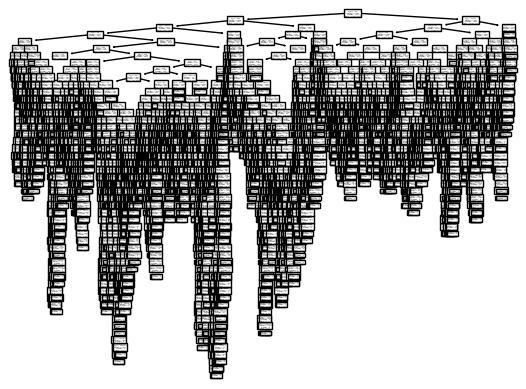

In [ ]:
from sklearn import tree
tree.plot_tree(dt_default);

In [ ]:
print(dt_default.tree_.node_count)

6515


In [ ]:
!pip install pydotplus

In [ ]:
! pip install six

In [ ]:
from six import StringIO

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

In [ ]:
# Importing required packages for visualization
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
from IPython.display import SVG

In [ ]:
features_list = list(df.columns[:-1])
features_list

['age',
 'fnlwgt',
 'education_num',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'workclass',
 'education',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'native_country']

In [ ]:
#dot_data = StringIO()
#export_graphviz(dt_default, out_file=dot_data,
#                feature_names=features_list, filled=True,rounded=True)
#
#graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
#Image(graph.create_png())
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import SVG

dot_data = StringIO()
export_graphviz(dt_default, out_file=dot_data,
                feature_names=features_list)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
svg_bytes = graph.create_svg()
SVG(svg_bytes)


KeyboardInterrupt: ignored

In [ ]:
svg_content = svg_bytes.decode()

# Save the SVG image to a file
with open('decision_tree.svg', 'w') as f:
    f.write(svg_content)


NameError: ignored

In [ ]:
#*****IGNORE*** This code was just to check the defined classes

classes = dt_default.classes_

# Get the "value" interval for a specific node (e.g., node_index)
value_interval = dt_default.tree_.value[0]

# Create a dictionary to store the class labels and their counts
class_counts = {}

# Iterate over the classes and the values in the "value" interval
for class_label, count in zip(classes, value_interval[0]):
    class_counts[class_label] = count

# Print the class labels and their counts
for class_label, count in class_counts.items():
    print(f"Class: {class_label}, Count: {count}")

Class: 0, Count: 17284.0
Class: 1, Count: 5508.0


In [ ]:
#Checking for random predictions
dt_default.predict([[32,190511,10,0,0,40,3,15,2,3,0,4,1,38]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

**Pruning**

In [ ]:
#Splitting testing data into validation and test
#Splitting the testing data

#Independent Variables/Feature
A = test.drop('income',axis=1)

#Response/Dependant variables
b = test['income']

In [ ]:
A_val,A_test,b_val,b_test = train_test_split(A,b,test_size=0.50,random_state=99)

In [ ]:
#Creating a copy of the trained tree
from sklearn.base import clone
copied_dt_default = clone(dt_default)
copied_dt_default.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
#Creating a copy of the trained tree
from sklearn.base import clone
clf = clone(dt_default)
clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn import metrics

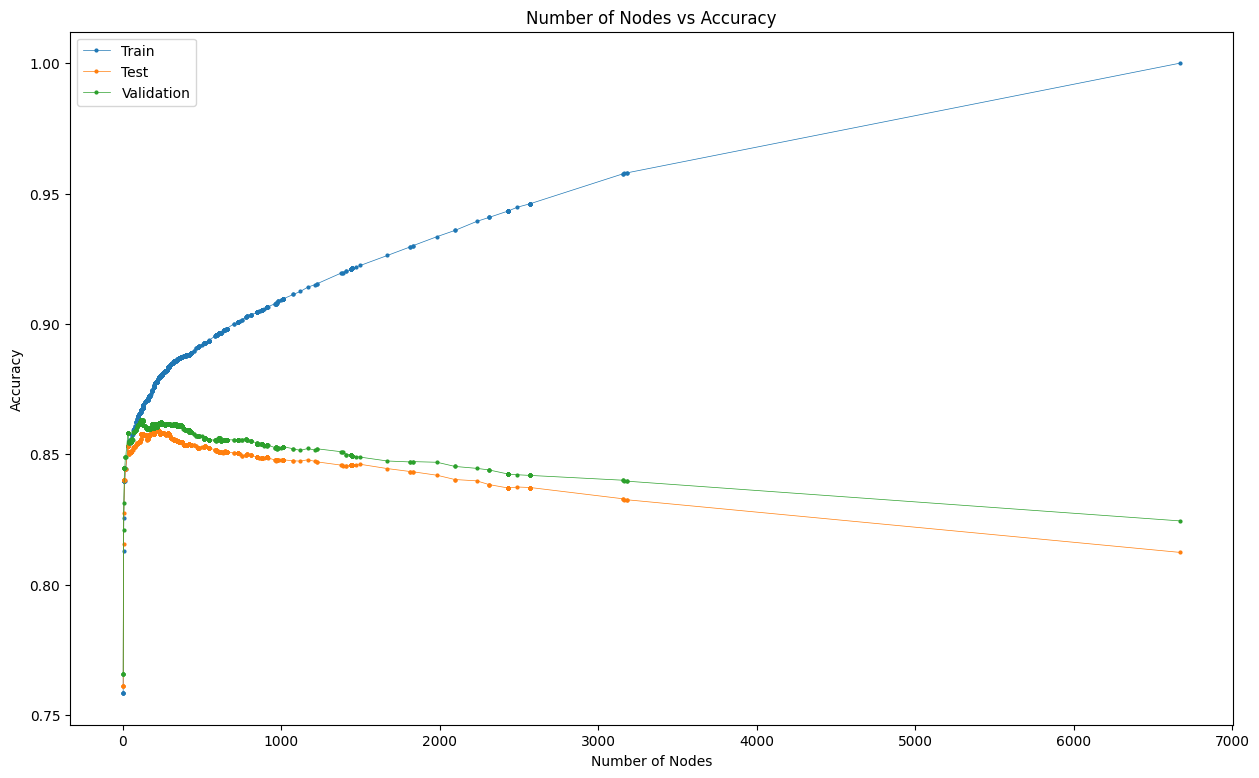

Accuracy after pruning: 85.39491462965238


In [ ]:
#imports the necessary libraries, including matplotlib for plotting and sklearn.metrics.accuracy_score for calculating accuracy.
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Prune the decision tree using reduced error pruning
#It applies cost complexity pruning to the decision tree classifier (clf) using the cost_complexity_pruning_path method.
#This method returns the effective alphas for pruning (ccp_alphas) and the corresponding impurities at each step (impurities).
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

#It creates an empty list (clfs) to store the pruned decision trees.
#It iterates over each alpha value in ccp_alphas and creates a new decision tree classifier (clf) with the specified alpha.
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
#It fits the decision tree on the training data.
#It appends the fitted decision tree to the list of pruned decision trees.

#It calculates the number of nodes (train_nodes) and accuracy scores (train_scores, test_scores, val_scores) for each pruned decision tree on the training, testing, and validation datasets, respectively.
#It plots the number of nodes versus accuracy using a line plot. The plot includes separate lines for the training, testing, and validation accuracies.
train_nodes = [clf.tree_.node_count for clf in clfs]
train_scores = [clf.score(X_train, y_train) for clf in clfs]
test_scores = [clf.score(X_test, y_test) for clf in clfs]
val_scores = [clf.score(A_val, b_val) for clf in clfs]

# Plotting the number of nodes vs accuracy
plt.figure(figsize=(15, 9))
plt.plot(train_nodes, train_scores, marker='o', label="Train", linewidth=0.5, markersize=2)
plt.plot(train_nodes, test_scores, marker='o', label="Test", linewidth=0.5, markersize=2)
plt.plot(train_nodes, val_scores, marker='o', label="Validation", linewidth=0.5, markersize=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Number of Nodes vs Accuracy")
plt.legend()
plt.show()

#It finds the optimal decision tree based on the highest validation accuracy by selecting the decision tree with the highest validation score (val_scores) and its corresponding alpha (optimal_alpha).
# Find the optimal decision tree based on validation accuracy
optimal_alpha = ccp_alphas[np.argmax(val_scores)]
optimal_clf = clfs[np.argmax(val_scores)]

# Make predictions on the new testing data using the optimal decision tree
y_new_pred = optimal_clf.predict(A_test)

# Evaluate the model
pruning_accuracy = metrics.accuracy_score(b_test, y_new_pred)
print("Accuracy after pruning:", pruning_accuracy * 100)


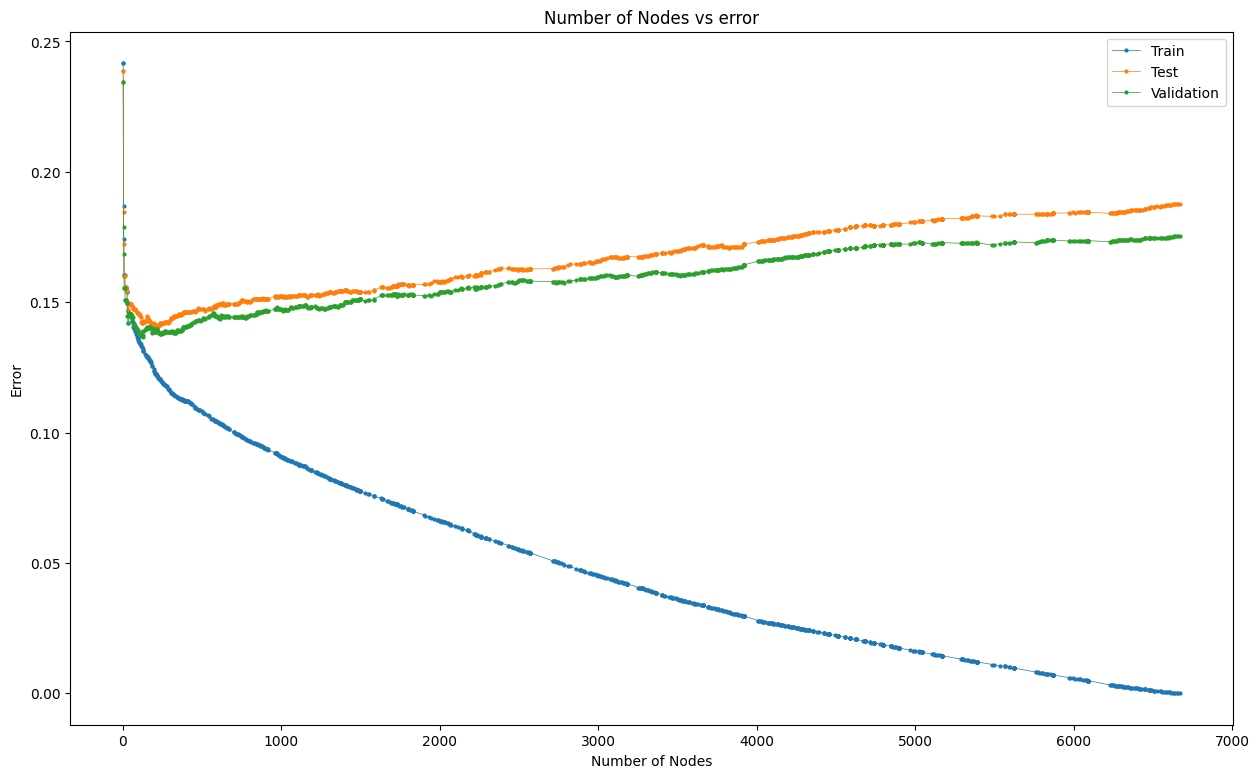

Error after pruning: 85.39491462965238


In [ ]:
#Use the same code as above just replac accuracy by 1-accuracy
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import accuracy_score

# Prune the decision tree using reduced error pruning
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []  # List to store the pruned decision tree classifiers
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)

train_nodes = [clf.tree_.node_count for clf in clfs]  # List to store the number of nodes for each pruned tree
train_scores = [clf.score(X_train, y_train) for clf in clfs]  # List to store the accuracy scores on the training data for each pruned tree
test_scores = [clf.score(X_test, y_test) for clf in clfs]  # List to store the accuracy scores on the testing data for each pruned tree
val_scores = [clf.score(A_val, b_val) for clf in clfs]  # List to store the accuracy scores on the validation data for each pruned tree

train_error = [1 - score for score in train_scores]  # List to store the error rates on the training data for each pruned tree
test_error = [1 - score for score in test_scores]  # List to store the error rates on the testing data for each pruned tree
val_error = [1 - score for score in val_scores]  # List to store the error rates on the validation data for each pruned tree

# Plotting the number of nodes vs error
plt.figure(figsize=(15, 9))
plt.plot(train_nodes, train_error, marker='o', label="Train", linewidth=0.5, markersize=2)
plt.plot(train_nodes, test_error, marker='o', label="Test", linewidth=0.5, markersize=2)
plt.plot(train_nodes, val_error, marker='o', label="Validation", linewidth=0.5, markersize=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Error")
plt.title("Number of Nodes vs Error")
plt.legend()
plt.show()

# Find the optimal decision tree based on validation accuracy
optimal_alpha = ccp_alphas[np.argmax(val_scores)]  # Select the alpha value with the maximum validation accuracy
optimal_clf = clfs[np.argmax(val_scores)]  # Select the decision tree with the maximum validation accuracy

# Make predictions on the new testing data using the optimal decision tree
y_new_pred = optimal_clf.predict(A_test)


In [ ]:
#Number of nodes in pruned decision tree
pruned_nodes = optimal_clf.tree_.node_count
print("Number of nodes in the pruned decision tree:", pruned_nodes)

Number of nodes in the pruned decision tree: 127


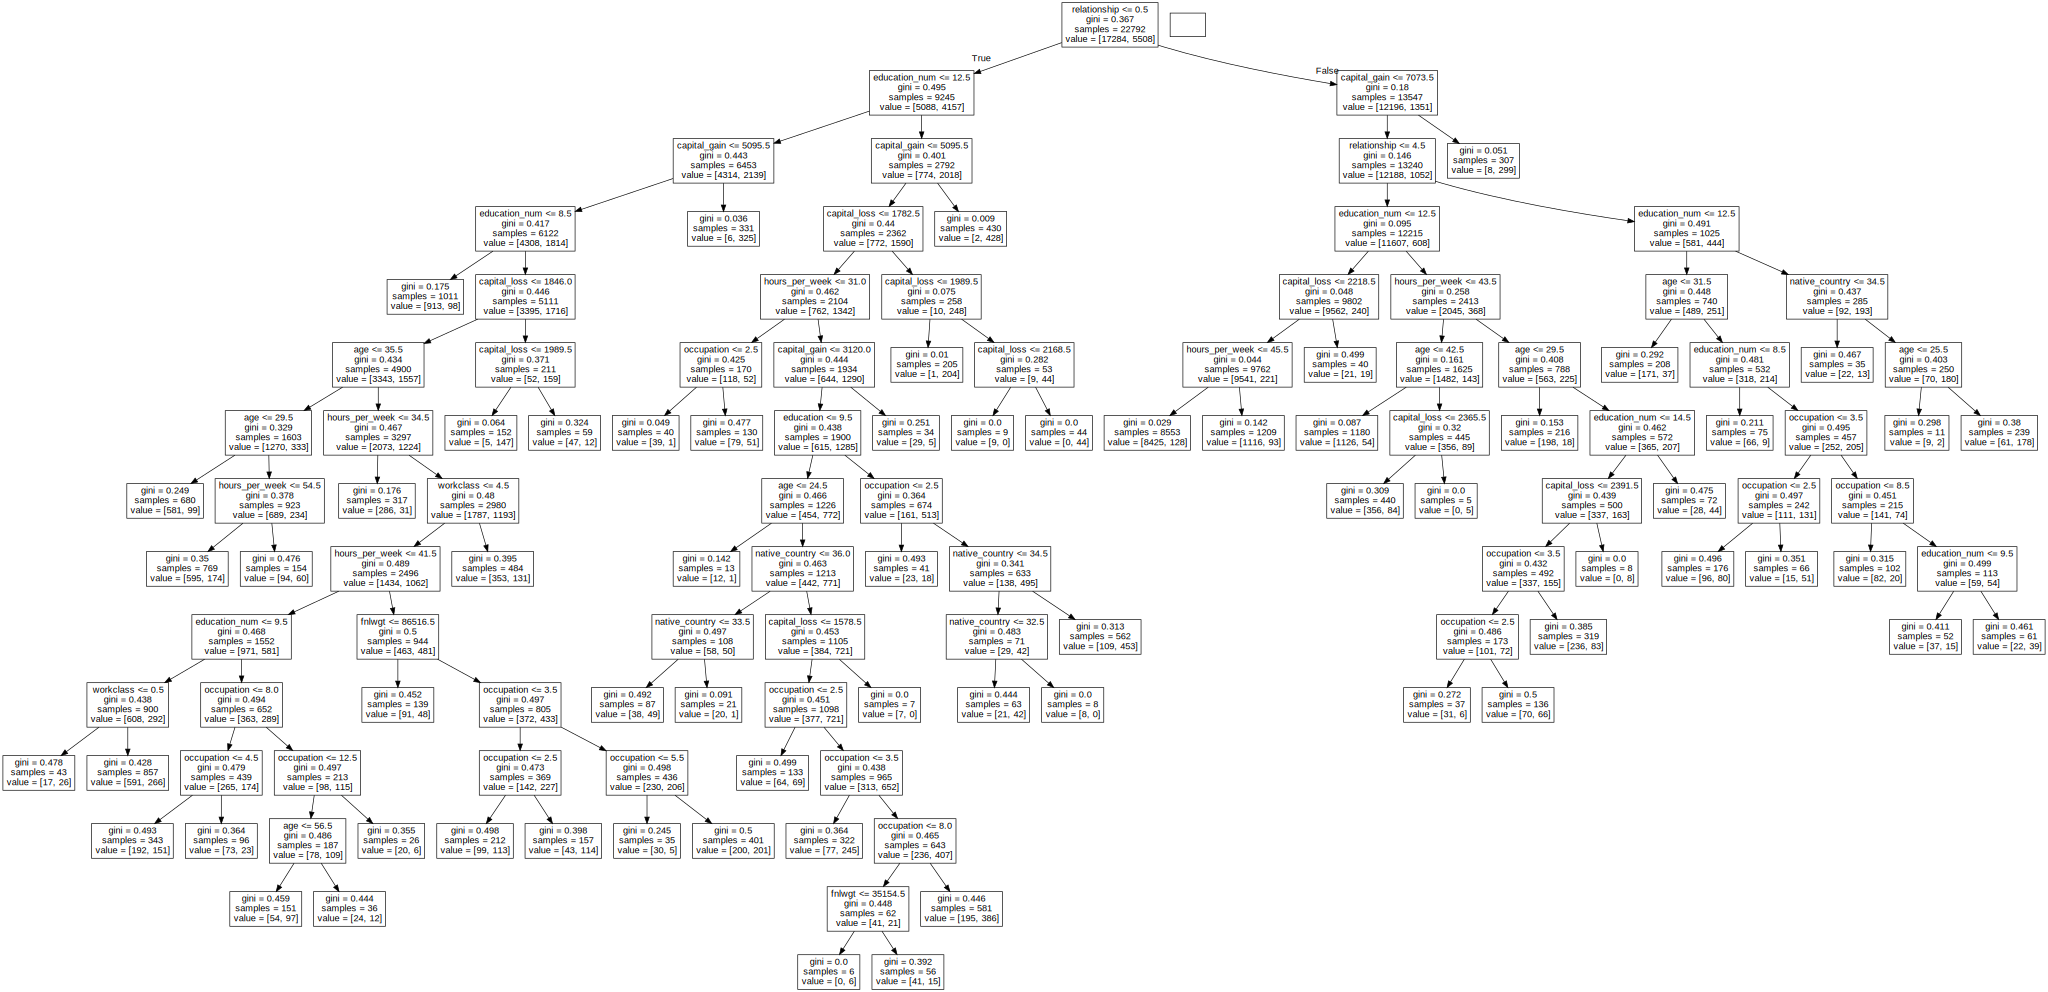

In [ ]:
#To viisualize the pruned tree
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import SVG

dot_data = StringIO()
export_graphviz(optimal_clf, out_file=dot_data,
                feature_names=features_list)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
svg_bytes = graph.create_svg()
SVG(svg_bytes)

In [ ]:
svg_content = svg_bytes.decode()

# Save the SVG image to a file
with open('prune_decision_tree.svg', 'w') as f:
    f.write(svg_content)


Please note thet the below code takes a very long time to process. So no interpretations could be done from it

In [ ]:
## Reduced error based pruning, Taking a lot of time to run on Colab, hence results could not be interpreted


#Importing the necessary libraries: copy, numpy, and matplotlib.pyplot.
import copy
import numpy as np
import matplotlib.pyplot as plt

#The initial error rates are calculated by predicting the target values using the decision tree classifier and then computing the error as the difference between the actual and predicted values.
# Initial error rates
y_train_pred = copied_dt_default.predict(X_train)
training_error = 1 - metrics.accuracy_score(y_train, y_train_pred)
y_val_pred = copied_dt_default.predict(A_val)
validation_error = 1 - metrics.accuracy_score(b_val, y_val_pred)
y_test_pred = copied_dt_default.predict(A_test)
testing_error = 1 - metrics.accuracy_score(b_test, y_test_pred)

# Append initial values to the lists
#Lists are initialized to store the number of nodes and error rates at each iteration of the pruning process.
num_nodes_list = [copied_dt_default.tree_.node_count]
training_error_list = [training_error]
validation_error_list = [validation_error]
testing_error_list = [testing_error]

#The code enters a while loop to perform the Reduced Error Pruning. The loop continues until no further improvement in the validation error is achieved.
#Inside the loop, a variable best_clf is initialized to keep track of the best decision tree classifier found so far.
# Perform Reduced Error Pruning
#The code iterates over each node of the decision tree for pruning.
#If a node has both left and right children (i.e., it is not a leaf node), the code creates a deep copy of the original decision tree (copied_dt_default) using the copy.deepcopy() function.
#
while True:
    best_clf = None
    best_validation_error = validation_error

    # Iterate over each node for pruning
    for node in range(copied_dt_default.tree_.node_count):
        if copied_dt_default.tree_.children_left[node] != copied_dt_default.tree_.children_right[node]:
            # Copy the original decision tree classifier
            pruned_clf = copy.deepcopy(copied_dt_default)

            # Prune the subtree at the current node
            pruned_clf.tree_.children_left[node] = pruned_clf.tree_.children_right[node]

            # Evaluate the pruned decision tree on the validation data
            y_val_pred = pruned_clf.predict(A_val)
            pruned_validation_error = 1 - metrics.accuracy_score(b_val, y_val_pred)

            # Check if pruning improves the validation error
            #If the pruned decision tree results in a lower validation error than the previous best, the best_clf and best_validation_error variables are updated with the pruned decision tree and its validation error, respectively.
            if pruned_validation_error <= best_validation_error:
                best_validation_error = pruned_validation_error
                best_clf = pruned_clf
#After iterating over all nodes, if a better decision tree (best_clf) has been found, the original decision tree (copied_dt_default) is updated with the pruned decision tree.
#The error rates are recalculated using the updated decision tree.
#The number of nodes in the decision tree (copied_dt_default.tree_.node_count) is appended to the num_nodes_list, and the error rates are appended to their respective lists.
    if best_clf is not None:
        copied_dt_default = best_clf

        # Update error rates
        y_train_pred = copied_dt_default.predict(X_train)
        training_error = 1 - metrics.accuracy_score(y_train, y_train_pred)
        y_val_pred = copied_dt_default.predict(A_val)
        validation_error = 1 - metrics.accuracy_score(b_val, y_val_pred)
        y_test_pred = copied_dt_default.predict(A_test)
        testing_error = 1 - metrics.accuracy_score(b_test, y_test_pred)

        # Append values to the lists
        num_nodes_list.append(copied_dt_default.tree_.node_count)
        training_error_list.append(training_error)
        validation_error_list.append(validation_error)
        testing_error_list.append(testing_error)
    else:
        break

# Plotting the graph
plt.plot(num_nodes_list, training_error_list, label='Training Error')
plt.plot(num_nodes_list, validation_error_list, label='Validation Error')
plt.plot(num_nodes_list, testing_error_list, label='Testing Error')
plt.xlabel('Number of Nodes')
plt.ylabel('Error Rate')
plt.title('Number of Nodes vs Error')
plt.legend()
plt.show()

In [ ]:
x = copied_dt_default.get_depth()
depth_nodes_accuracy = []

# Iterate over different depths
for i in range(1, x):
    # Create decision tree with maximum depth i
    pruned_dp_tree = DecisionTreeClassifier(max_depth=i)
    pruned_dp_tree.fit(X_train, y_train)  # Train the decision tree
    y_pred = pruned_dp_tree.predict(X_train)  # Make predictions on the testing data
    accuracy = metrics.accuracy_score(y_train, y_pred)  # Calculate accuracy
    num_nodes = pruned_dp_tree.tree_.node_count  # Get the number of nodes in the decision tree
    depth_nodes_accuracy.append((i, num_nodes, accuracy))  # Append depth, number of nodes, and accuracy to the list

depth_nodes_accuracy



[(1, 3, 0.7583362583362583),
 (2, 7, 0.8256844506844507),
 (3, 15, 0.8397244647244647),
 (4, 31, 0.8442435942435943),
 (5, 57, 0.8523604773604774),
 (6, 97, 0.8566163566163566),
 (7, 159, 0.8594682344682345),
 (8, 247, 0.8633731133731134),
 (9, 375, 0.8678483678483678),
 (10, 555, 0.8751316251316251),
 (11, 783, 0.8823710073710074),
 (12, 1063, 0.8896542646542647),
 (13, 1427, 0.8983853983853984),
 (14, 1835, 0.9068971568971569),
 (15, 2261, 0.9159354159354159),
 (16, 2695, 0.9251491751491752),
 (17, 3145, 0.9342313092313093),
 (18, 3581, 0.9427430677430677),
 (19, 4015, 0.9503773253773253),
 (20, 4383, 0.9579677079677079),
 (21, 4743, 0.9646367146367146),
 (22, 5077, 0.9709547209547209),
 (23, 5365, 0.9765707265707265),
 (24, 5587, 0.9807827307827308),
 (25, 5777, 0.9841172341172341),
 (26, 5959, 0.9869252369252369),
 (27, 6079, 0.9897332397332397),
 (28, 6187, 0.9918831168831169),
 (29, 6297, 0.9938574938574939),
 (30, 6369, 0.9951298701298701),
 (31, 6441, 0.995963495963496),
 (32, 

We observe that we get max accuracy at depth 8 is maximum with an accuracy of 85.3% and 247 nodes

So we tarin the tree now only for a max depth of 8, as its giving maxinimum accuracy

In [ ]:
! pip uninstall scikit-learn
! pip install scikit-learn


! pip install --upgrade scikit-learn


Found existing installation: scikit-learn 1.3.0
Uninstalling scikit-learn-1.3.0:
  Would remove:
    /usr/local/lib/python3.10/dist-packages/scikit_learn-1.3.0.dist-info/*
    /usr/local/lib/python3.10/dist-packages/scikit_learn.libs/libgomp-a34b3233.so.1.0.0
    /usr/local/lib/python3.10/dist-packages/sklearn/*
Proceed (Y/n)? ERROR: Operation cancelled by user
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/cli/base_command.py", line 169, in exc_logging_wrapper
    status = run_func(*args)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/commands/uninstall.py", line 105, in run
    uninstall_pathset = req.uninstall(
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_install.py", line 680, in uninstall
    uninstalled_pathset.remove(auto_confirm, verbose)
  File "/usr/local/lib/python3.10/dist-packages/pip/_internal/req/req_uninstall.py", line 375, in remove
    if auto_confirm or self._allowed_to_proceed(

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import datasets
from sklearn import tree
import matplotlib.pyplot as plt
from io import StringIO
import pydotplus
from IPython.display import SVG

# Create a decision tree classifier with max_depth = 8 and criterion = 'entropy'
try_tree = DecisionTreeClassifier(max_depth=8, criterion='entropy')

# Train the decision tree classifier
try_tree.fit(X_train, y_train)

# Make predictions on the testing data
y_pred_loop = try_tree.predict(A_test)

# Calculate and print the accuracy of the decision tree
accuracy = metrics.accuracy_score(b_test, y_pred_loop)
print("Accuracy:", accuracy * 100)

# Print the depth and number of nodes of the decision tree
print("Depth:", try_tree.max_depth)
print("Number of Nodes:", try_tree.tree_.node_count)


#print("plotting and saving the decision tree at depth = 7")

#pruned_tree = DecisionTreeClassifier(max_depth=7,criterion='entropy')
#pruned_tree.fit(X_train, y_train)
#print("node count of pruned tree =" , pruned_tree.tree_.node_count)

Accuracy: 85.21066208082544
Depth: 8
Number of Nodes: 243


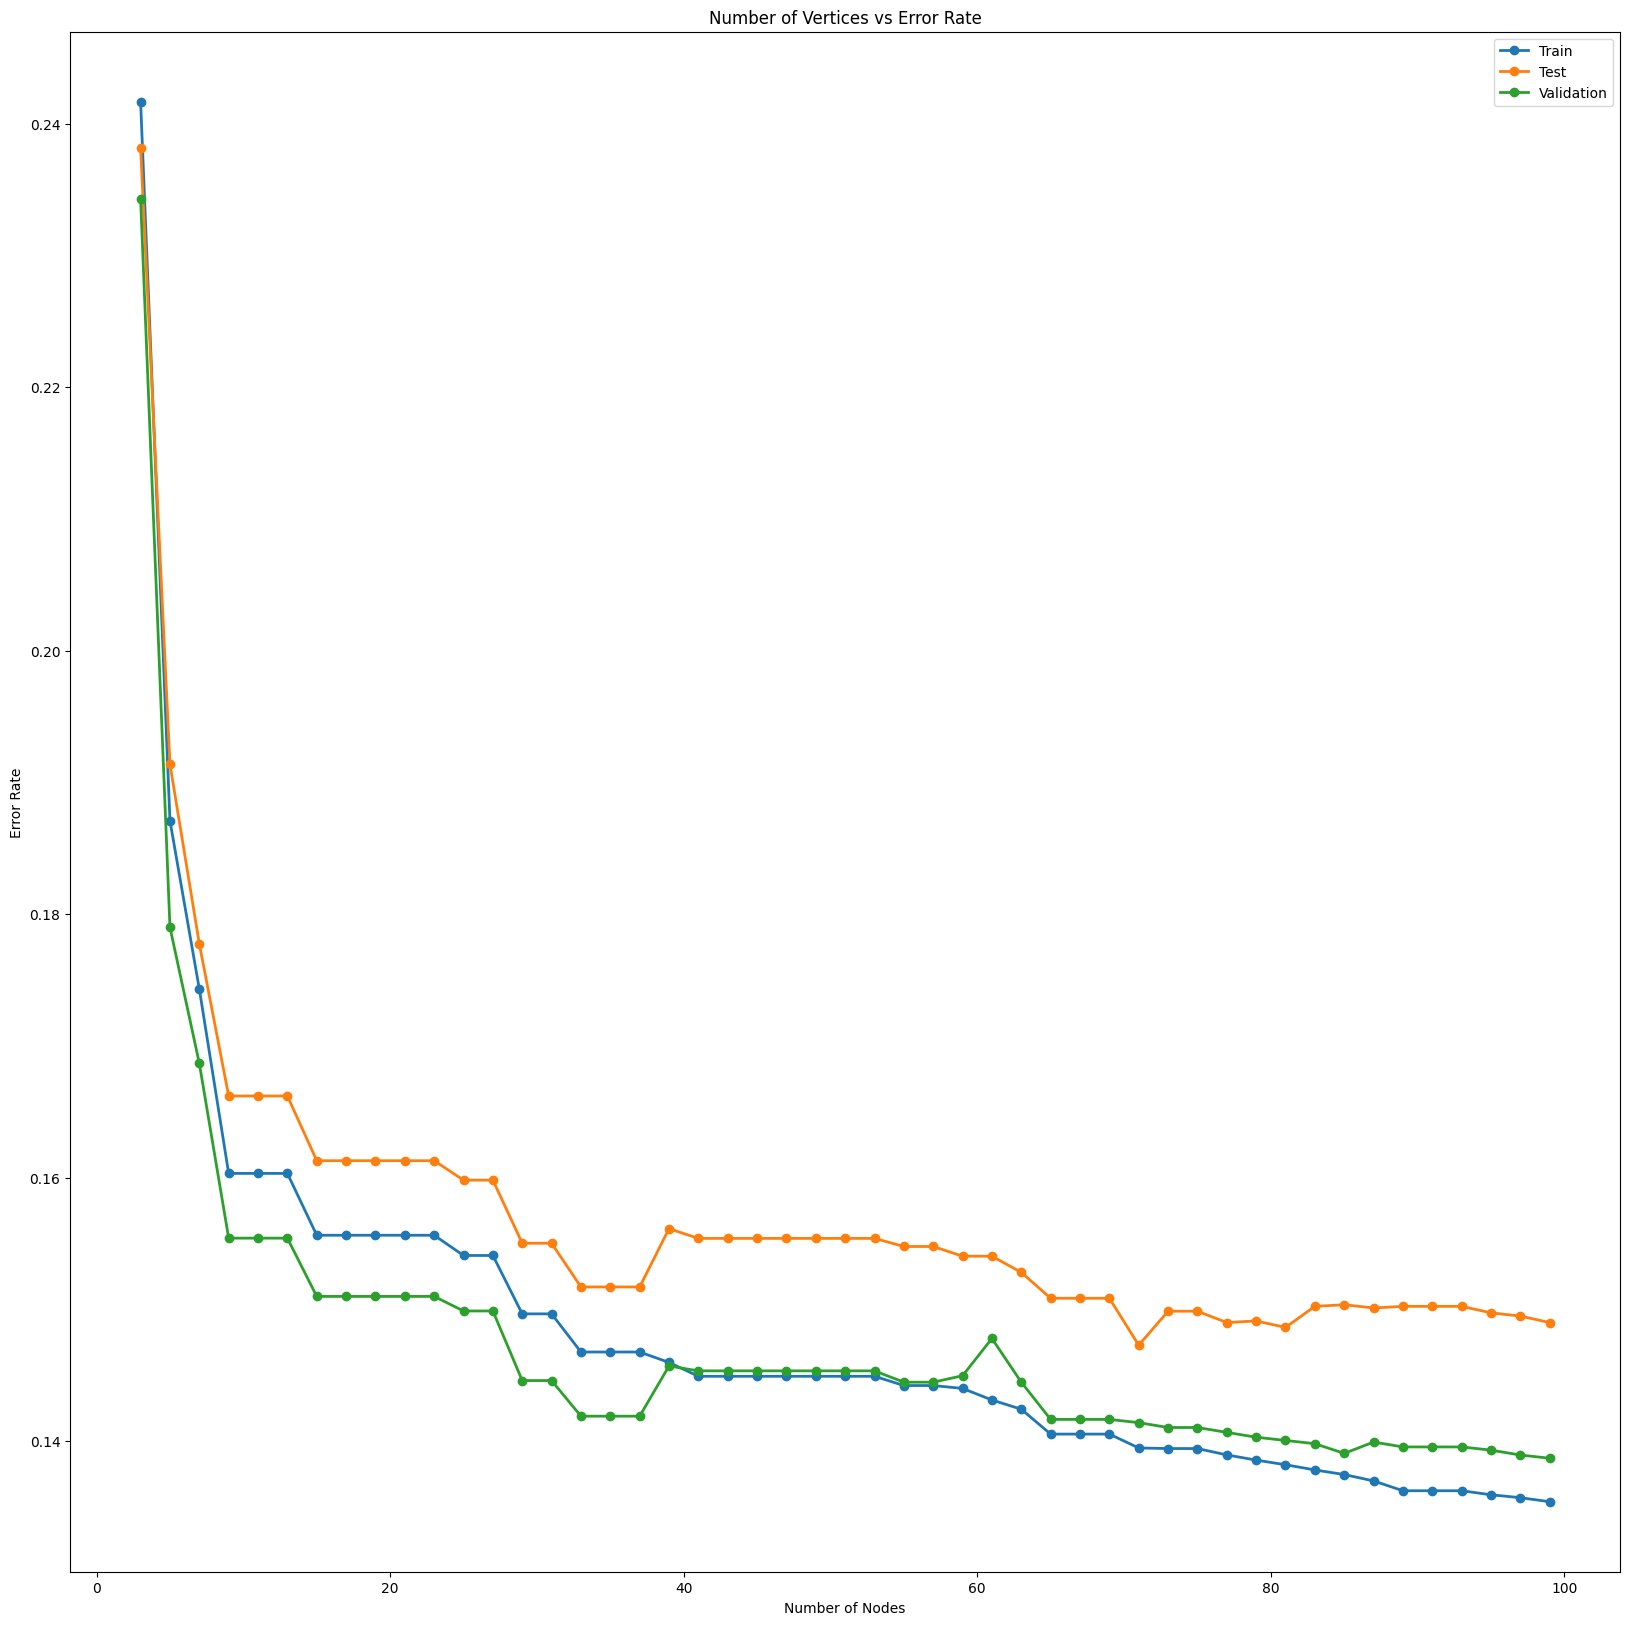

In [ ]:
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

max_nodes_range = range(2, 51)  # Range of maximum nodes or maximum depth values to explore
error_rates = []  # List to store the error rates
error_rates_val = []  # List to store the error rates of validation data
error_rates_test = []  # List to store the error rates of testing data
num_vertices = []  # List to store the number of vertices (nodes)

# Iterate over the maximum nodes range
for max_nodes in max_nodes_range:
    try_tree = DecisionTreeClassifier(max_leaf_nodes=max_nodes)  # Create a decision tree classifier with specified maximum nodes
    try_tree.fit(X_train, y_train)  # Train the decision tree classifier
    num_vertices.append(try_tree.tree_.node_count)  # Append the number of vertices (nodes) to the list
    error_rate = 1 - try_tree.score(X_train, y_train)  # Calculate the error rate on the training data
    error_rate_test = 1 - try_tree.score(A_test, b_test)  # Calculate the error rate on the testing data
    error_rate_val = 1 - try_tree.score(A_val, b_val)  # Calculate the error rate on the validation data
    error_rates.append(error_rate)  # Append the error rate to the list
    error_rates_test.append(error_rate_test)  # Append the error rate of testing data to the list
    error_rates_val.append(error_rate_val)  # Append the error rate of validation data to the list

# Plotting the graph
plt.figure(figsize=(20, 20))
plt.plot(num_vertices, error_rates, label="Train", marker='o', linewidth=2)
plt.plot(num_vertices, error_rates_test, label="Test", marker='o', linewidth=2)
plt.plot(num_vertices, error_rates_val, label="Validation", marker='o', linewidth=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Error Rate")
plt.title("Number of Vertices vs Error Rate")
plt.legend()
plt.show()


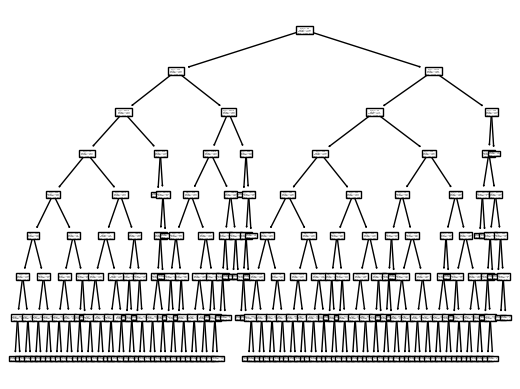

In [ ]:
#Visualize the pruned tree
from sklearn import tree
tree.plot_tree(try_tree);

In [ ]:
print(try_tree.tree_.node_count)

243


In [ ]:
# Evaluate the pruned tree on the test set
#X_test =  # Your test feature matrix
#y_test =  # Your test target vector
#pruned_predictions = pruned_tree.predict(X_test)
#accuracy = accuracy_score(y_test, pruned_predictions)
#print("Pruned Decision Tree Accuracy:", accuracy)

Combing Train and test data to do predictions

In [ ]:
from sklearn.utils import shuffle
combined_df = pd.concat([df, test], ignore_index=True)

# Shuffle the combined dataframe
shuffled_df = shuffle(combined_df)

# Reset the index of the shuffled dataframe
shuffled_df.reset_index(drop=True, inplace=True)

shuffled_df.to_csv("combined_encoded.csv")

In [ ]:
shuffled_df

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,income
0,40,165309,4,0,0,8,3,5,5,0,1,4,0,38,0
1,31,213307,9,0,0,40,1,11,4,0,3,4,0,38,0
2,40,42703,10,0,0,40,1,15,2,0,5,4,0,38,1
3,25,173212,13,0,0,40,3,9,4,9,3,4,1,37,0
4,34,143392,9,0,0,40,3,11,4,11,3,4,0,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,30,159323,10,0,0,65,3,15,0,11,4,4,0,1,0
48838,24,69640,13,0,0,40,3,9,4,11,3,4,1,38,0
48839,52,146579,9,0,0,40,5,11,0,11,4,2,1,38,0
48840,34,208043,11,7298,0,45,3,8,2,9,0,4,1,38,1


In [ ]:
#Splitting testing data into validation and test
#Splitting the testing data

#Independent Variables/Feature
comb_X = shuffled_df.drop('income',axis=1)

#Response/Dependant variables
comb_y = shuffled_df['income']

In [ ]:
comb_X_train,comb_X_test,comb_y_train,comb_y_test = train_test_split(comb_X,comb_y,test_size=0.33,random_state=99)

In [ ]:
#Use sklearn for decsion tree

#Importing the CLassifier
from sklearn.tree import DecisionTreeClassifier
new_default = DecisionTreeClassifier()
#.fit method to train the model
new_default.fit(comb_X_train,comb_y_train)

DecisionTreeClassifier()

In [ ]:
#  check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

# making predictions
comb_y_predict_default = new_default.predict(comb_X_test)

# Printing classifier report after prediction
print(classification_report(comb_y_test,comb_y_predict_default))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12250
           1       0.61      0.62      0.62      3868

    accuracy                           0.81     16118
   macro avg       0.75      0.75      0.75     16118
weighted avg       0.81      0.81      0.81     16118



In [ ]:
from sklearn.tree import export_graphviz
from io import StringIO
import pydotplus
from IPython.display import SVG

dot_data = StringIO()
export_graphviz(new_default, out_file=dot_data,
                feature_names=features_list)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
svg_bytes = graph.create_svg()
SVG(svg_bytes)


KeyboardInterrupt: ignored

In [ ]:
print(new_default.tree_.node_count)

9513


In [ ]:
q = new_default.get_depth()
q

44

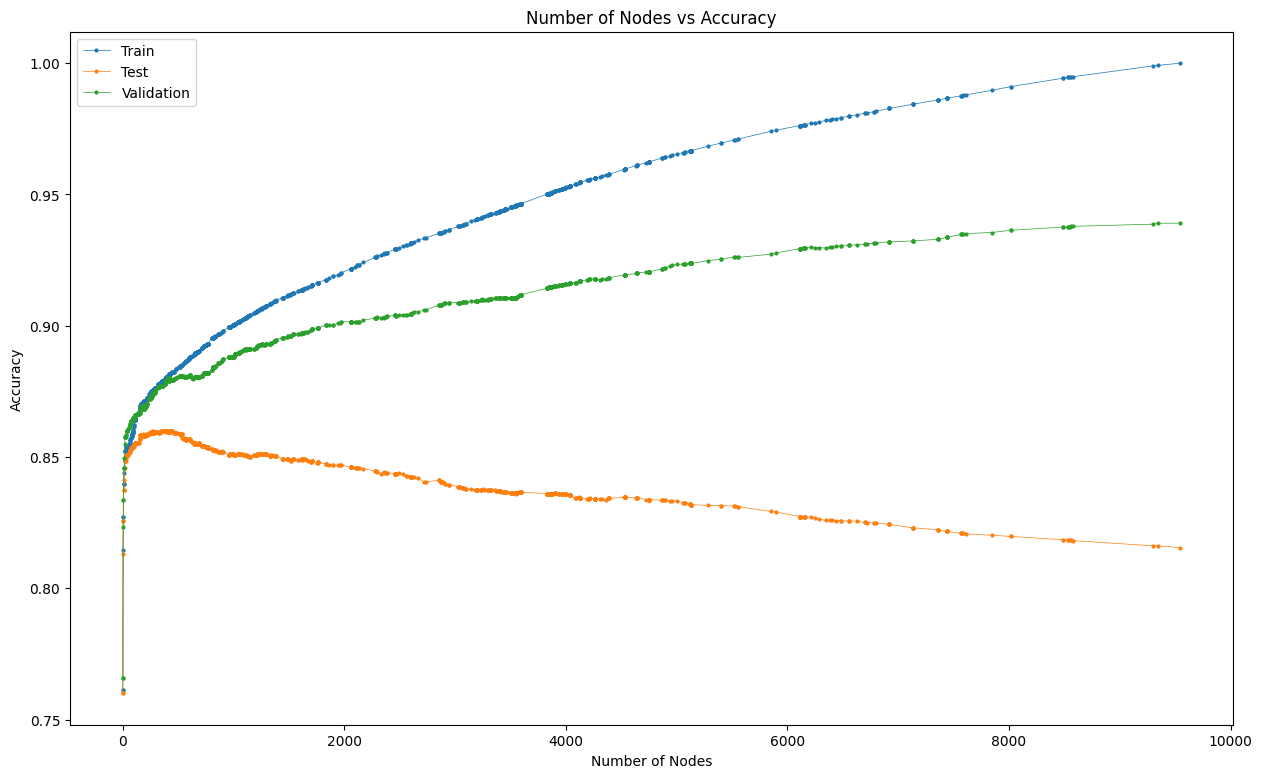

Accuracy after pruning: 81.54857922819208


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Prune the decision tree using reduced error pruning
path = new_default.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []  # List to store the pruned decision tree classifiers
for ccp_alpha in ccp_alphas:
    new_default = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    new_default.fit(comb_X_train, comb_y_train)
    clfs.append(new_default)

train_nodes = [clf.tree_.node_count for clf in clfs]  # List to store the number of nodes for each pruned tree
train_scores = [clf.score(comb_X_train, comb_y_train) for clf in clfs]  # List to store the accuracy scores on the training data for each pruned tree
test_scores = [clf.score(comb_X_test, comb_y_test) for clf in clfs]  # List to store the accuracy scores on the testing data for each pruned tree
val_scores = [clf.score(A_val, b_val) for clf in clfs]  # List to store the accuracy scores on the validation data for each pruned tree

# Plotting the number of nodes vs accuracy
plt.figure(figsize=(15, 9))
plt.plot(train_nodes, train_scores, marker='o', label="Train", linewidth=0.5, markersize=2)
plt.plot(train_nodes, test_scores, marker='o', label="Test", linewidth=0.5, markersize=2)
plt.plot(train_nodes, val_scores, marker='o', label="Validation", linewidth=0.5, markersize=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Accuracy")
plt.title("Number of Nodes vs Accuracy")
plt.legend()
plt.show()

# Find the optimal decision tree based on validation accuracy
optimal_alpha = ccp_alphas[np.argmax(val_scores)]  # Select the alpha value with the maximum validation accuracy
comb_optimal_clf = clfs[np.argmax(val_scores)]  # Select the decision tree with the maximum validation accuracy

# Make predictions on the new testing data using the optimal decision tree
y_new_pred = comb_optimal_clf.predict(comb_X_test)

# Evaluate the model
pruning_accuracy = metrics.accuracy_score(comb_y_test, y_new_pred)
print("Accuracy after pruning:", pruning_accuracy * 100)


In [ ]:
#Use sklearn for decsion tree

#Importing the CLassifier
#.fit method to train the model
comb_optimal_clf.fit(comb_X_train,comb_y_train)
# making predictions
comb_y_predict_default = comb_optimal_clf.predict(comb_X_test)

# Printing classifier report after prediction
print(classification_report(comb_y_test,comb_y_predict_default))

              precision    recall  f1-score   support

           0       0.88      0.88      0.88     12250
           1       0.61      0.62      0.62      3868

    accuracy                           0.82     16118
   macro avg       0.75      0.75      0.75     16118
weighted avg       0.82      0.82      0.82     16118



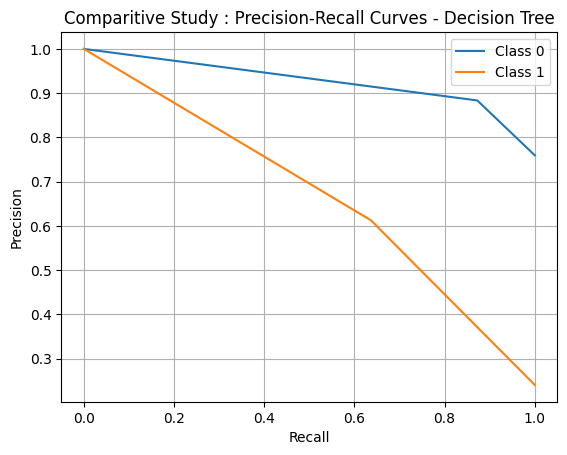

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = comb_optimal_clf.predict_proba(comb_X_test)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(comb_y_test, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(comb_y_test, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

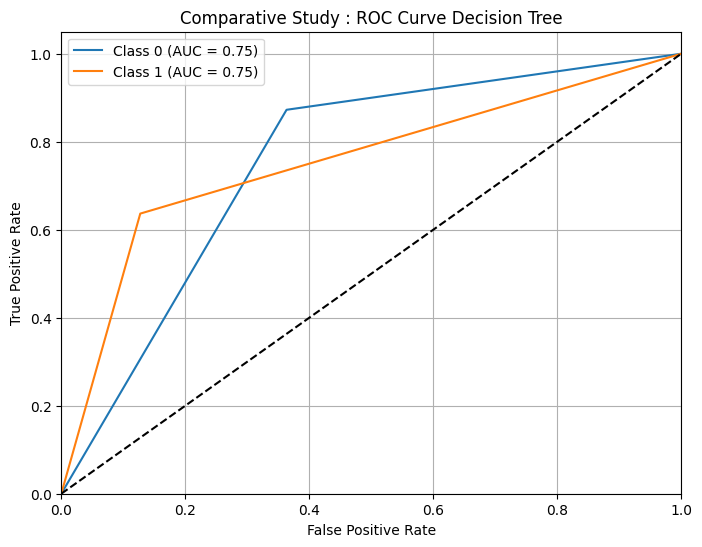

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = comb_optimal_clf.predict_proba(comb_X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(comb_optimal_clf.classes_)):
    fpr[i], tpr[i], _ = roc_curve(comb_y_test, probas[:, i], pos_label=comb_optimal_clf.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(comb_optimal_clf.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {comb_optimal_clf.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative Study : ROC Curve Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

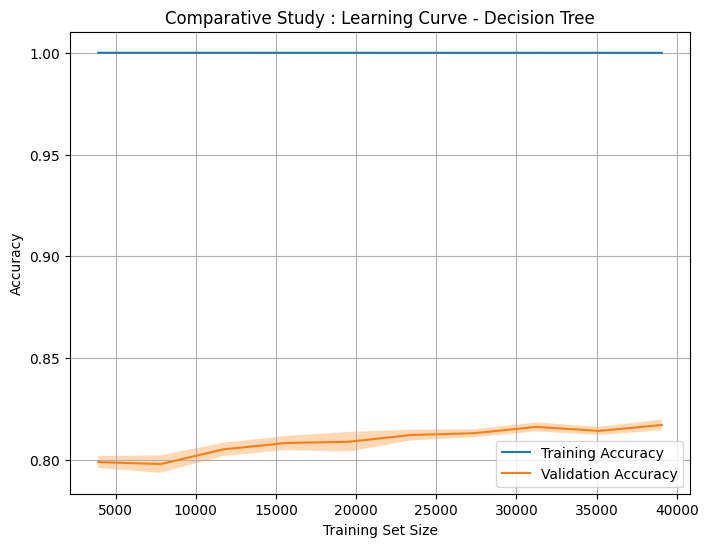

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    comb_optimal_clf, comb_X, comb_y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Comparative Study : Learning Curve - Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

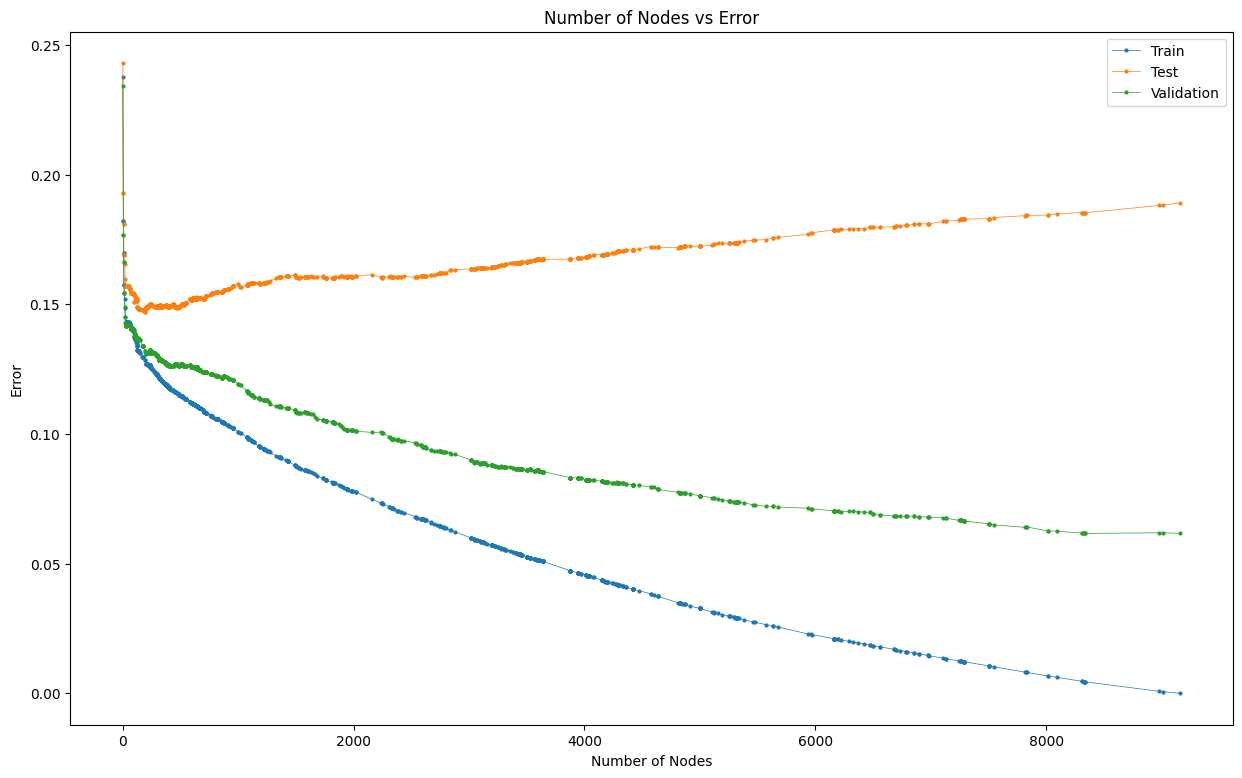

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Prune the decision tree using reduced error pruning
path = new_default.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

clfs = []  # List to store the pruned decision tree classifiers
for ccp_alpha in ccp_alphas:
    new_default = DecisionTreeClassifier(random_state=0, ccp_alpha=ccp_alpha)
    new_default.fit(comb_X_train, comb_y_train)
    clfs.append(new_default)

train_nodes = [clf.tree_.node_count for clf in clfs]  # List to store the number of nodes for each pruned tree
train_scores = [clf.score(comb_X_train, comb_y_train) for clf in clfs]  # List to store the accuracy scores on the training data for each pruned tree
test_scores = [clf.score(comb_X_test, comb_y_test) for clf in clfs]  # List to store the accuracy scores on the testing data for each pruned tree
val_scores = [clf.score(A_val, b_val) for clf in clfs]  # List to store the accuracy scores on the validation data for each pruned tree
train_error = [1 - score for score in train_scores]  # List to store the training error for each pruned tree
test_error = [1 - score for score in test_scores]  # List to store the testing error for each pruned tree
val_error = [1 - score for score in val_scores]  # List to store the validation error for each pruned tree

# Plotting the number of nodes vs error
plt.figure(figsize=(15, 9))
plt.plot(train_nodes, train_error, marker='o', label="Train", linewidth=0.5, markersize=2)
plt.plot(train_nodes, test_error, marker='o', label="Test", linewidth=0.5, markersize=2)
plt.plot(train_nodes, val_error, marker='o', label="Validation", linewidth=0.5, markersize=2)
plt.xlabel("Number of Nodes")
plt.ylabel("Error")
plt.title("Number of Nodes vs Error")
plt.legend()
plt.show()



**Random Forest Classifier**





Both classification and regression can be accomplished using the supervised learning technique known as Random forest. This particular bagging ensemble approach builds many decision trees at once while attempting to learn independently from the dataset. The majority vote is used to determine the winning guess.

By integrating the output of various decision trees, random forests avoid the issue of overfitting and provide high accuracy. Random forests perform well even with enormous datasets.







In [ ]:
#Importing the required libraries
from sklearn.ensemble import RandomForestClassifier

#Building the Classifier
random_forest = RandomForestClassifier(random_state = 50)
#Training
random_forest.fit(comb_X_train,comb_y_train)

#Predictions
y_randomforest_predictions = random_forest.predict(comb_X_test)

In [ ]:
from sklearn.metrics import f1_score
#Evaluation Metrics of the model Accuracy and fscore
print('Accuracy score:',round(accuracy_score(comb_y_test, y_randomforest_predictions) * 100, 2))
print('F1 score:',round(f1_score(comb_y_test, y_randomforest_predictions) * 100, 2))


Accuracy score: 86.14
F1 score: 68.28


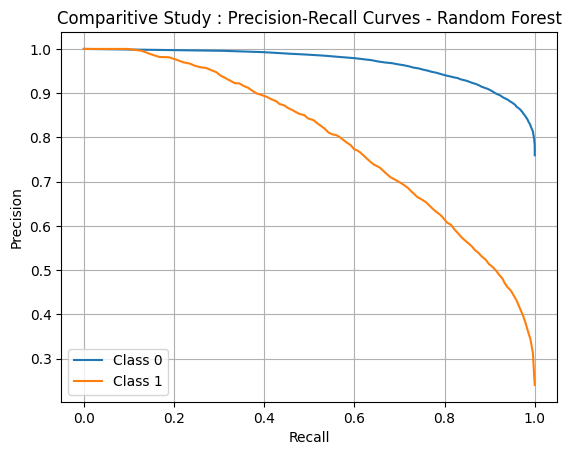

In [ ]:
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

# Get the probabilities for each class
probas = random_forest.predict_proba(comb_X_test)

# Compute precision and recall for class 0 (<= 50K)
precision_0, recall_0, _ = precision_recall_curve(comb_y_test, probas[:, 0], pos_label=0)

# Compute precision and recall for class 1 (>= 50K)
precision_1, recall_1, _ = precision_recall_curve(comb_y_test, probas[:, 1], pos_label=1)

# Plot precision-recall curves
plt.plot(recall_0, precision_0, label='Class 0')
plt.plot(recall_1, precision_1, label='Class 1')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Comparitive Study : Precision-Recall Curves - Random Forest')
plt.legend()
plt.grid(True)
plt.show()

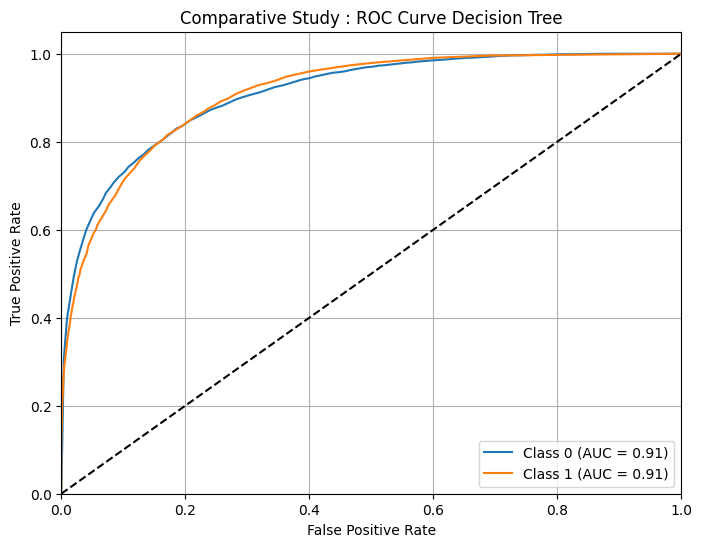

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get the predicted probabilities for each class
probas = random_forest.predict_proba(comb_X_test)

# Compute the ROC curve for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(len(random_forest.classes_)):
    fpr[i], tpr[i], _ = roc_curve(comb_y_test, probas[:, i], pos_label=random_forest.classes_[i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot the ROC curve for each class
plt.figure(figsize=(8, 6))
for i in range(len(random_forest.classes_)):
    plt.plot(fpr[i], tpr[i], label=f'Class {random_forest.classes_[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparative Study : ROC Curve Decision Tree')
plt.legend()
plt.grid(True)
plt.show()

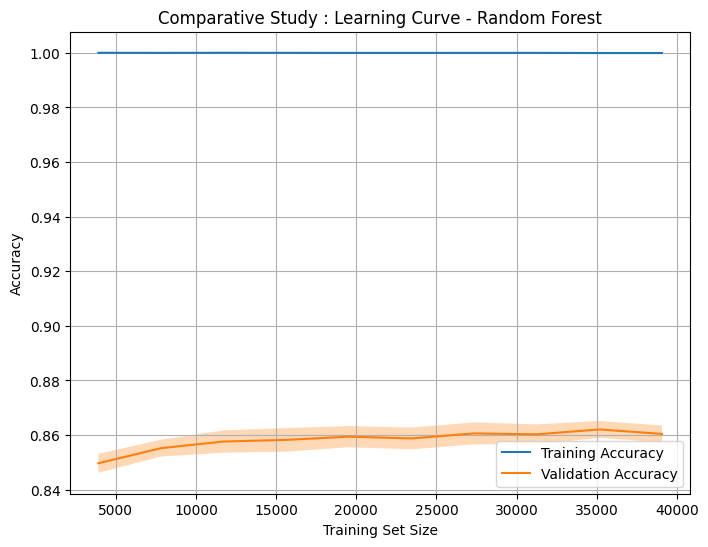

In [ ]:
from sklearn.model_selection import learning_curve

# Define the training sizes for the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    random_forest, comb_X, comb_y, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

# Calculate the mean and standard deviation of the training and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, label='Training Accuracy')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.3)
plt.plot(train_sizes, test_scores_mean, label='Validation Accuracy')
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.3)
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Comparative Study : Learning Curve - Random Forest')
plt.legend()
plt.grid(True)
plt.show()